In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings


In [2]:
iris = load_iris()
X = iris.data[:, :4] 
y = iris.target

In [3]:
#X variables
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#Y variable :  Sentosa-0 ,Versicolor-1 ,Virginica-2
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#Y variable values
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.data.shape

(150, 4)

C:\Users\Sundar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


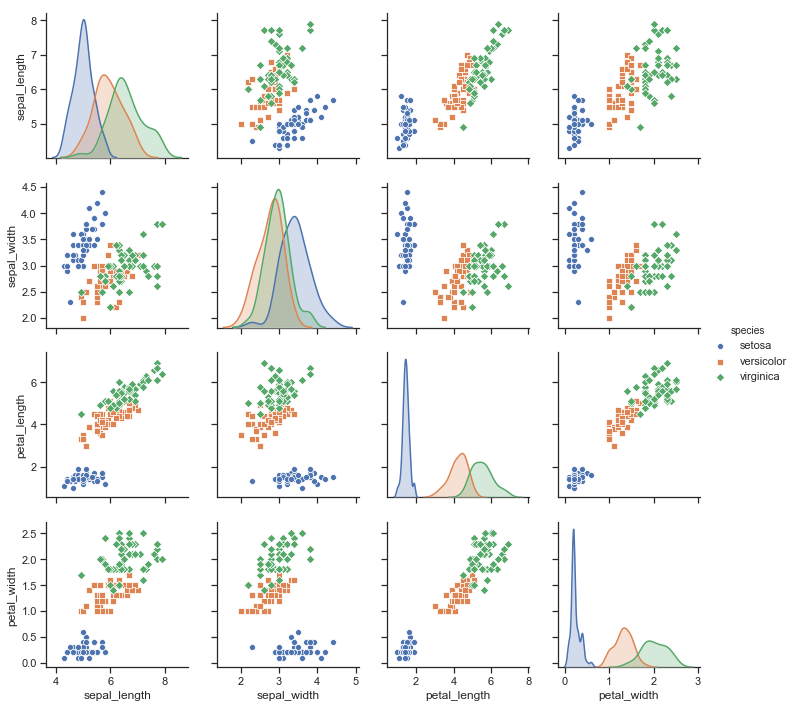

In [7]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris_df = sns.load_dataset("iris")
g = sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [9]:
#Scaling required for few algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#Displaying Model Metrics 
def Report(model,y_pred):
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="Blues",fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('Train score: ', model.score(X_train_scaled, y_train))
    print('Test score: ', model.score(X_test_scaled, y_test))

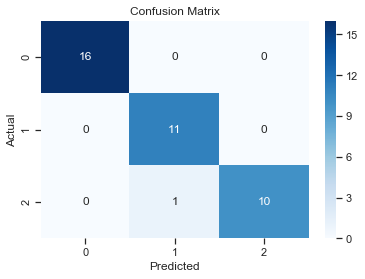

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Train score:  0.30357142857142855
Test score:  0.42105263157894735


In [11]:
# 1.Descision Tree Classifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
y_pred_dtree = dtree_model.predict(X_test)
Report(dtree_model,y_pred_dtree)


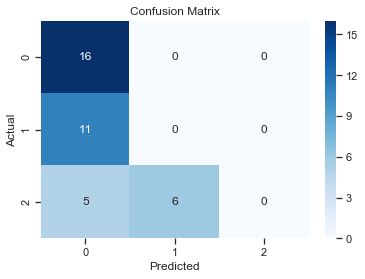

Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        16
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11

   micro avg       0.42      0.42      0.42        38
   macro avg       0.17      0.33      0.22        38
weighted avg       0.21      0.42      0.28        38

Train score:  0.3125
Test score:  0.42105263157894735


C:\Users\Sundar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sundar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sundar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# 2.linear SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
y_pred_svm = svm_model_linear.predict(X_test_scaled)
Report(svm_model_linear,y_pred_svm)

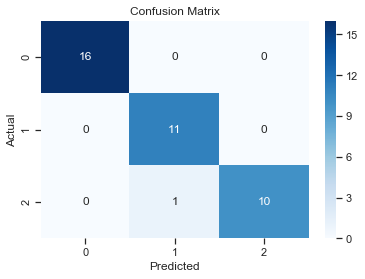

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Train score:  0.9553571428571429
Test score:  0.9736842105263158


In [13]:
# 3.KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
Report(knn,y_pred_knn)

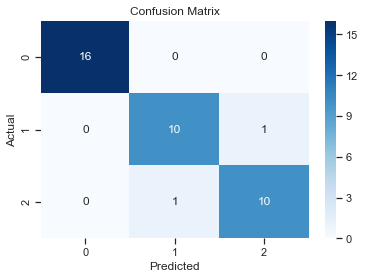

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

   micro avg       0.95      0.95      0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

Train score:  0.09821428571428571
Test score:  0.02631578947368421


In [14]:
#4. Naive Bayes classifier 
gnb = GaussianNB().fit(X_train, y_train) 
y_pred_gnb = gnb.predict(X_test) 
Report(gnb,y_pred_gnb)